In [2]:
pkg load statistics
cd "../../tests"

In [15]:
A = csvread("kalman_parkinlot_drive2.csv");


data.lat = A(:,1);
data.lng = A(:,2);
data.acx = A(:,3);
data.acy = A(:,4);
data.acz = A(:,5);
data.gyx = A(:,6);
data.gyy = A(:,7);
data.gyz = A(:,8);


time = 0.01:0.01:(length(data.lat)/100);

In [19]:
% figure("position",[0 0 1000 700])

data.lat_factor = latFactor(data.lat);
lonFact = 40075000/360;

% figure("position",[0 0 1000 600])
% plot((data.lat-data.lat(1)).*data.lat_factor,(data.lng-data.lng(1)).*lonFact,'x')

% figure("position",[0 0 1000 600])
% plot(data.lat,data.lng,'x')

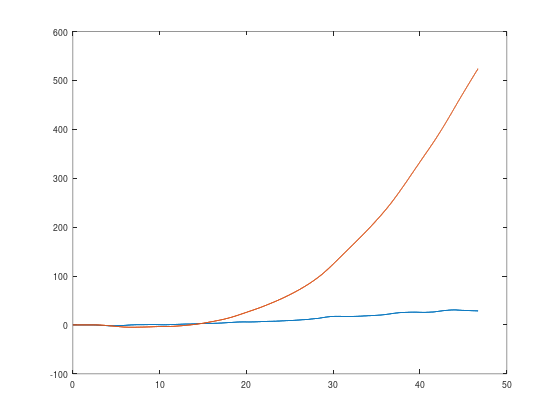

In [20]:
for i = 1:length(data.acx)
    if i == 1
        velocity(i) = 0;
    else
        velocity(i) = velocity(i-1) + data.acx(i)*0.01/940;  
    endif
endfor

for i = 1:length(velocity)
    if i == 1
        position(i) = 0;
    else
        position(i) = position(i-1) + velocity(i)*0.01;  
    endif
endfor


plot(time,velocity,time,position)

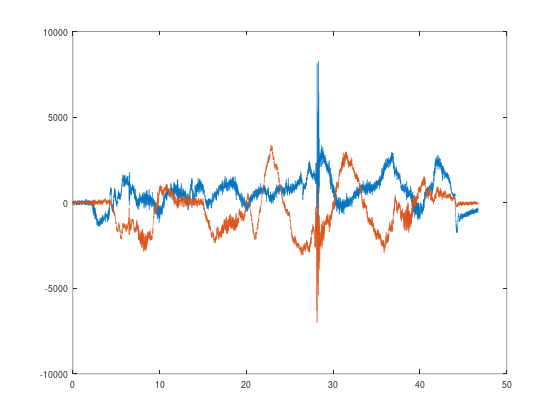

In [24]:

plot(time,data.acx,time,data.acy)

In [18]:
function factor = latFactor(lat)
	% Calculates meters/degree og longitude for given latitude
	factor = 40075000./(1./cos((lat./180).*pi).*360);
endfunction